In [1]:
import os
import json
import numpy as np
import SimpleITK as sitk

[1 1 1]


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

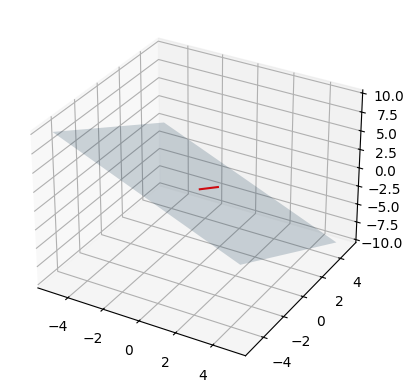

In [16]:
from skspatial.objects import Plane, Points, Vector
from skspatial.plotting import plot_3d
plane_1 = Plane(point=[0, 0, 0], normal=[1, 1, 1])
vector = Vector([1, 0, 1])
print(plane_1.normal)

# points = Points([[0, 0, 0], [1, 3, 5], [-5, 6, 3], [3, 6, 7], [-2, 6, 7]])

# plane = Plane.best_fit(points)


plot_3d(
    vector.plotter(point=plane_1.point, color='r'),
    plane_1.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
)

In [51]:
from scipy.io import loadmat

def process_branch(branches):
    # mask = branches == 1
    # key_points = branches[mask] - 1
    key_points = np.where(branches == 1)
    return key_points
# 指定.mat文件的路径
mat_file_path = r'E:\tests_slicers\matlab_save\arota_003.mat'

# 使用loadmat函数加载.mat文件
mat_data = loadmat(mat_file_path)

# mat_data现在是一个字典，其中包含了.mat文件中所有变量
# 你可以通过变量名作为键来访问这些变量的数据
# 例如，如果.mat文件中有一个变量名为'X'，你可以使用mat_data['X']来访问它的数据

# 打印字典的键，即所有变量的名称
print(mat_data.keys())

# 假设我们要访问名为'X'的变量的数据
# if 'Centerlines' in mat_data:
#     X_data = mat_data['Centerlines'][0]
#     X_data_transformed = []
#     # print(X_data)
#     X_data_transformed = [np.array(j).astype(np.float32)[[2,0,1]] - 1 for i in X_data for j in i]

#     print(X_data_transformed)
    # print(np.transpose(X_data, (2, 0, 1)).shape)
    
# key_points = process_branch(X_data)
# print(key_points)




X_data = mat_data['skel']
print(X_data.shape)

dict_keys(['__header__', '__version__', '__globals__', 'Centerlines', 'branches', 'skel', 'start_ps'])
(512, 512, 431)


In [8]:
file_path = r'E:\GuidedResearchProject\nnUNet\nnUNet_preprocessed\Dataset027_Aorta\nnUNetPlans_3d_fullres\arota_006_categoryk.npz'
img_array = np.load(file_path)['key'].squeeze()
print(np.max(img_array))
print(img_array.shape)
save_array = img_array

final_save = sitk.GetImageFromArray(save_array)
# final_save.SetSpacing([2.37,1.89,2.66]) # 同上
final_save.SetSpacing([0.787,0.787,1.0]) # 同上
direction = [-1.0000, 0.0000, 0.0000, 0.0000, -1.0000, 0.0000, 0.0000, 0.0000, 1.0000]

# final_save.SetDirection(direction)
final_save.SetOrigin([0,0,0])
# 将结果保存回文件
sitk.WriteImage(final_save, r'E:\GuidedResearchProject\nnUNet\check3.nii')

KeyError: 'seg is not a file in the archive'

In [2]:
# 14/18/36因为后来重新做了处理，所以需要注意一下volume的shape是不是正确的
base_path = r'E:\FinalDataset'
for file in os.listdir(base_path):
    if file in ['Patient_9','Patient_17','Patient_19']:
        print(file)
        original_cta_path = os.path.join(base_path, file, 'VesselMask_2_label.nii')
        # aaa_path = os.path.join(base_path, file, 'AAA1.nii')
        save_path = os.path.join(base_path, file, 'test.nii')

        # 读取原始CTA和AAA图像
        original_cta_img = sitk.ReadImage(original_cta_path)
        # aaa_cta_img = sitk.ReadImage(aaa_path)

        # 膨胀AAA图像
        dilate_filter = sitk.BinaryDilateImageFilter()
        dilate_filter.SetKernelType(sitk.sitkBall)
        dilate_filter.SetKernelRadius(1)  # 设置膨胀核半径
        cta_dilated = dilate_filter.Execute(original_cta_img)

        # # 将SimpleITK图像转换为NumPy数组
        # original_cta_data = sitk.GetArrayFromImage(original_cta_img)
        # aaa_cta_dilated_data = sitk.GetArrayFromImage(aaa_cta_dilated)

        # # 执行交集运算，并将结果转换为整数类型
        # intersection_data = np.logical_and(original_cta_data, aaa_cta_dilated_data).astype(np.int16)

        # # 将两个整数数据数组相加
        # modified_cta_data = original_cta_data + intersection_data

        # # 将NumPy数组转换回SimpleITK图像
        modified_cta_img = sitk.GetImageFromArray(cta_dilated)
        modified_cta_img.CopyInformation(original_cta_img)

        # 保存新的NIfTI图像到磁盘
        sitk.WriteImage(modified_cta_img, save_path)

Patient_17


KeyboardInterrupt: 

In [5]:
# 14/18/36因为后来重新做了处理，所以需要注意一下volume的shape是不是正确的
base_path = r'E:\FinalDataset'
for file in os.listdir(base_path):
    if file in ['Patient_19']:
        original_cta_path = os.path.join(base_path, file, 'VesselMask_2_label.nii')
        save_path = os.path.join(base_path, file, 'test.nii')

        # 读取原始CTA和AAA图像
        original_cta_img = sitk.ReadImage(original_cta_path)

        # 膨胀AAA图像
        dilate_filter = sitk.BinaryDilateImageFilter()
        dilate_filter.SetKernelType(sitk.sitkBall)
        dilate_filter.SetKernelRadius(1)  # 设置膨胀核半径
        cta_dilated = dilate_filter.Execute(original_cta_img)

        # # # 将NumPy数组转换回SimpleITK图像
        # modified_cta_img = sitk.GetImageFromArray(cta_dilated)
        # modified_cta_img.CopyInformation(original_cta_img)

        # # 保存新的NIfTI图像到磁盘
        sitk.WriteImage(cta_dilated, save_path)

In [ ]:

Patient_10
Patient_11
Patient_12
Patient_13
Patient_14
Patient_16
Patient_17
Patient_18
Patient_19
Patient_21
Patient_22
Patient_23
Patient_24
Patient_25
Patient_26
Patient_27
Patient_29
Patient_30
Patient_33
Patient_35
Patient_36
Patient_37



{
        "train": [
            "arota_001",
            "arota_005",
            "arota_006",
            "arota_008",
            "arota_010",
            "arota_011",
            "arota_012",
            "arota_013",
            "arota_014",
            "arota_016",
            "arota_021",
            "arota_022",
            "arota_023",
            "arota_025",
            "arota_026",
            "arota_027",
            "arota_029",
            "arota_030",
            "arota_033",
            "arota_035",
            "arota_036",
            "arota_037"
        ],
        "val": [
            "arota_009",
            "arota_017",
            "arota_018",
            "arota_019",
            "arota_024",
        ]
    }

In [27]:
# np.random.seed(0)  # 为了可重复性设置随机种子
# array = np.random.rand(4, 4) * 2  # 创建一个随机数组，数值范围从 0 到 2

# # 使用布尔索引过滤出 1 到 2 之间的值
# filtered_array = np.where((array > 1) & (array < 2))


# print("1 到 2 之间的最大值是:", array[filtered_array])
# print("1 到 2 之间的最大值是:", np.argmax(array))

In [28]:
# for file_name in os.listdir(r'E:\key_points'):
#     os.rename(os.path.join(r'E:\key_points', file_name), os.path.join(r'E:\key_points', 'Patient_' + file_name[9:]))

In [3]:
def transform_points(points: np.ndarray, spacing: np.ndarray, origin: np.ndarray, direction_matrix: np.ndarray):
    scale_matrix = np.diag(spacing)
    transform_matrix = np.dot(direction_matrix, scale_matrix)
    ijk_points = []
    for point in points:
        ijk_point = np.dot(np.linalg.inv(transform_matrix),
                            np.array(point) - np.array(origin))
        ijk_points.append(ijk_point)
    return np.array(ijk_points)

In [4]:
base_path = r'E:\key_points'

min_dist = 10000
count = 0

for file in os.listdir(base_path):
    json_path = os.path.join(base_path, file, file + '.json')
    with open(json_path, 'r') as key_file_path:
        key_json = json.load(key_file_path)
    points = np.array(key_json['ras_points'])
    origin = np.array(key_json['ImageOrigin'])
    direction_matrix = np.array(key_json['IJKtoRASDirectionMatrix'])
    spacing = [2.37,1.89,2.66]
    new_points = transform_points(points, spacing, origin, direction_matrix)
    
    dist_01 = np.linalg.norm(new_points[0] - new_points[1])
    dist_02 = np.linalg.norm(new_points[0] - new_points[2])
    dist_23 = np.linalg.norm(new_points[2] - new_points[3])
    dist_03 = np.linalg.norm(new_points[0] - new_points[3])
    dist_12 = np.linalg.norm(new_points[1] - new_points[2])
    dist_13 = np.linalg.norm(new_points[1] - new_points[3])
    # print(dist_01)
    
    distances = [dist_01,dist_12, dist_13, dist_23]

    # 计算最大距离
    min_distance = min(distances)
    # print('file', file)
    if min_distance < 16:
        print(file)
    print('min_distance', min_distance)
    if min_distance < min_dist:
        min_dist = min_distance
        
print(min_dist)




min_distance 20.7992706923691
Patient_10
min_distance 15.39064955317587
min_distance 29.47390078406252
min_distance 26.734441927326504
min_distance 27.44944266353379
min_distance 25.502495043648644
min_distance 24.15194070226901
min_distance 25.419665353450824
min_distance 24.640254605580484
min_distance 19.715731408843183
min_distance 26.37530298739382
min_distance 16.221613025578524
min_distance 20.48051944969085
min_distance 31.366769458800846
min_distance 20.088071737594806
min_distance 23.718097766590883
min_distance 25.034243929769385
min_distance 21.16081159806675
min_distance 23.042781735441853
min_distance 22.691747059788042
min_distance 17.877166011091205
min_distance 23.156232258567872
min_distance 29.167824642764575
min_distance 20.0559174593611
min_distance 23.901550844219884
min_distance 22.435965891068328
min_distance 25.57265419415464
min_distance 21.106833313925595
15.39064955317587


In [30]:
NAME = 1
data = {
        'ra_left':[[-181.191,-142.818,250.019]],
        'ra_right':[[-185.616,-136.274,239.538]],
        'main_branch':[[-167.852,-125.670,146.885]],
        'lowbranch_left':[[-185.153,-157.451,120.746]],
        'lowbranch_right':[[-126.529,-155.457,120.036]],
        'AAA_pos':[[-189.665,-123.619,190.222]],
        'ras_points':[[-181.191,-142.818,250.019],[-185.616,-136.274,239.538],[-167.852,-125.670,146.885],[-185.153,-157.451,120.746],[-126.529,-155.457,120.036]],
        "ImageDimensions": [512,512,298],
        "ImageSpacing": [0.592,0.592,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
          ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [31]:
NAME = 3
data = {
        'ra_left': [-238.725, -189.224, 292.413], 'ra_right': [-239.554, -192.322, 299.424], 'main_branch': [-231.884, -183.663, 196.148], 'lowbranch_left': [-275.26, -197.436, 137.276], 'lowbranch_right': [-208.801, -194.578, 142.765], 'AAA_pos': [-221.799, -184.283, 224.73],
        'ras_points':[[-238.725, -189.224, 292.413], [-239.554, -192.322, 299.424], [-231.884, -183.663, 196.148], [-275.26, -197.436, 137.276], [-208.801, -194.578, 142.765]],
        "ImageDimensions": [512,512,431],
        "ImageSpacing": [0.763,0.763,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
    
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [32]:
NAME = 5
data = {
        'ra_left': [-194.747, -230.482, 291.778], 'ra_right': [-193.336, -229.056, 287.499], 'main_branch': [-206.779, -199.523, 194.111], 'lowbranch_left': [-224.656, -224.318, 141.346], 'lowbranch_right': [-171.241, -219.004, 121.544], 'AAA_pos': [-186.885, -206.613, 227.517],
        'ras_points':[[-194.747, -230.482, 291.778], [-193.336, -229.056, 287.499], [-206.779, -199.523, 194.111], [-224.656, -224.318, 141.346],[-171.241, -219.004, 121.544]],
        "ImageDimensions": [512,512,395],
        "ImageSpacing": [0.791,0.791,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
          ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [33]:
NAME = 6
data = {
        'ra_left': [-228.948, -226.514, 312.891], 'ra_right': [-228.594, -225.719, 307.477], 'main_branch': [-226.617, -209.511, 192.626], 'lowbranch_left': [-246.394, -226.164, 142.43], 'lowbranch_right': [-178.586, -225.655, 133.98], 'AAA_pos': [-231.502, -199.992, 226.295],
        'ras_points':[[-228.948, -226.514, 312.891], [-228.594, -225.719, 307.477], [-226.617, -209.511, 192.626], [-246.394, -226.164, 142.43], [-178.586, -225.655, 133.98]],
        "ImageDimensions": [512,512,403],
        "ImageSpacing": [0.818,0.818,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [34]:
NAME = 8
data = {
        'ra_left': [-225.251, -216.264, 320.771], 
        'ra_right': [-225.19, -216.073, 320.485], 
        'main_branch': [-212.008, -187.403, 197.098], 
        'lowbranch_left': [-251.599, -222.005, 157.994], 
        'lowbranch_right': [-188.46, -223.433, 160.257], 
        'AAA_pos': [-193.798, -230.652, 155.955],
        "ras_points": [[-225.251, -216.264, 320.771], [-225.19, -216.073, 320.485], [-212.008, -187.403, 197.098], [-251.599, -222.005, 157.994], [-188.46, -223.433, 160.257]],
        "ImageDimensions": [512,512,414],
        "ImageSpacing": [0.832,0.832,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [35]:
NAME = 9
data = {
        'ra_left': [-192.41, -161.331, 297.149], 'ra_right': [-191.986, -160.656, 293.005], 'main_branch': [-160.028, -140.333, 174.068], 'lowbranch_left': [-195.428, -163.382, 151.237], 'lowbranch_right': [-123.358, -179.197, 124.283], 'AAA_pos': [-166.928, -125.004, 216.442],
        "ras_points": [[-192.41, -161.331, 297.149], [-191.986, -160.656, 293.005], [-160.028, -140.333, 174.068], [-195.428, -163.382, 151.237], [-123.358, -179.197, 124.283]],
        "ImageDimensions": [512,512,358],
        "ImageSpacing": [0.684,0.684,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [36]:
NAME = 10
data = {
        'ra_left': [-204.374, -214.979, 284.309], 
        'ra_right': [-200.865, -213.587, 275.396], 
        'main_branch': [-224.894, -236.567, 184.67], 
        'lowbranch_left': [-277.91, -258.463, 144.096], 
        'lowbranch_right': [-210.135, -240.358, 147.614], 
        'AAA_pos': [-197.419, -211.333, 248.61],
        "ras_points": [[-204.374, -214.979, 284.309], [-200.865, -213.587, 275.396], [-224.894, -236.567, 184.67], [-277.91, -258.463, 144.096], [-210.135, -240.358, 147.614]],
        "ImageDimensions": [512,512,388],
        "ImageSpacing": [0.848,0.848,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }

if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [37]:
NAME = 11
data = {
        'ra_left': [-321.541, -294.254, 304.52], 
        'ra_right': [-321.231, -295.538, 309.468], 
        'main_branch': [-287.559, -283.736, 201.22], 
        'lowbranch_left': [-331.17, -321.062, 161.103], 
        'lowbranch_right': [-239.609, -312.072, 160.478], 
        'AAA_pos': [-312.775, -286.739, 240.413],
        "ras_points": [[-321.541, -294.254, 304.52], [-321.231, -295.538, 309.468], [-287.559, -283.736, 201.22], [-331.17, -321.062, 161.103], [-239.609, -312.072, 160.478]],
        "ImageDimensions": [512,512,326],
        "ImageSpacing": [0.977,0.977,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [38]:
NAME = 12
data = {
        'ra_left': [-191.884, -157.628, 260.799], 'ra_right': [-192.541, -160.681, 267.928], 'main_branch': [-162.418, -148.083, 150.39], 'lowbranch_left': [-196.143, -185.778, 121.932], 'lowbranch_right': [-128.853, -187.794, 103.781],'AAA_pos': [-191.751, -139.618, 193.466],
        "ras_points": [[-191.884, -157.628, 260.799], [-192.541, -160.681, 267.928], [-162.418, -148.083, 150.39], [-196.143, -185.778, 121.932], [-128.853, -187.794, 103.781]],
        "ImageDimensions": [512,512,378],
        "ImageSpacing": [0.662,0.662,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }

if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [39]:
NAME = 13
data =  {
        'ra_left': [-219.614, -210.507, 280.844], 'ra_right': [-218.585, -214.193, 292.494], 'main_branch': [-221.138, -198.003, 172.029], 'lowbranch_left': [-249.142, -230.995, 125.26], 'lowbranch_right': [-179.25, -236.127, 113.106], 'AAA_pos': [-238.398, -190.942, 203.414],
        "ras_points":  [[-219.614, -210.507, 280.844], [-218.585, -214.193, 292.494], [-221.138, -198.003, 172.029], [-249.142, -230.995, 125.26], [-179.25, -236.127, 113.106]],
        "ImageDimensions": [512,512,388],
        "ImageSpacing": [0.787,0.787,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }

if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [40]:
NAME = 14
data = {
        'ra_left': [-242.836, -182.589, 281.838], 'ra_right': [-243.028, -179.471, 274.534], 'main_branch': [-239.297, -166.135, 180.352], 'lowbranch_left': [-261.757, -189.625, 126.748], 'lowbranch_right': [-189.914, -192.008, 120.636],  'AAA_pos': [-246.037, -164.928, 199.538],
        "ras_points": [[-242.836, -182.589, 281.838], [-243.028, -179.471, 274.534], [-239.297, -166.135, 180.352], [-261.757, -189.625, 126.748], [-189.914, -192.008, 120.636]],
        "ImageDimensions": [512,512,380],
        "ImageSpacing": [0.846,0.846,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [41]:
NAME = 16
data = {
        'ra_left': [-262.402, -239.387, 269.555], 'ra_right': [-263.439, -232.056, 249.739], 'main_branch': [-256.964, -222.454, 172.306], 'lowbranch_left': [-277.609, -257.827, 123.022], 'lowbranch_right': [-222.275, -248.021, 114.087], 'AAA_pos': [-255.082, -219.957, 205.315],
        "ras_points": [[-262.402, -239.387, 269.555], [-263.439, -232.056, 249.739], [-256.964, -222.454, 172.306], [-277.609, -257.827, 123.022], [-222.275, -248.021, 114.087]],
        "ImageDimensions": [512,512,326],
        "ImageSpacing": [0.977,0.977,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [42]:
NAME = 17
data = {
        'ra_left': [-203.717, -199.16, 256.018], 'ra_right': [-203.414, -201.845, 265.132], 'main_branch': [-194.408, -197.293, 170.16], 'lowbranch_left': [-230.512, -216.466, 120.358], 'lowbranch_right': [-157.812, -210.081, 119.554],'AAA_pos': [-198.159, -195.671, 186.522],
        "ras_points": [[-203.717, -199.16, 256.018], [-203.414, -201.845, 265.132], [-194.408, -197.293, 170.16], [-230.512, -216.466, 120.358], [-157.812, -210.081, 119.554]],
        "ImageDimensions": [512,512,328],
        "ImageSpacing": [0.758,0.758,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [43]:
NAME = 18
data = {
        'ra_left': [-186.316, -159.551, 243.03], 'ra_right': [-182.75, -161.406, 249.905], 'main_branch': [-173.963, -128.563, 143.125], 'lowbranch_left': [-205.306, -160.653, 84.009], 'lowbranch_right': [-141.908, -149.699, 97.118], 'AAA_pos': [-192.238, -135.762, 189.988],
        "ras_points": [[-186.316, -159.551, 243.03], [-182.75, -161.406, 249.905], [-173.963, -128.563, 143.125], [-205.306, -160.653, 84.009], [-141.908, -149.699, 97.118]],
        "ImageDimensions": [512,512,308],
        "ImageSpacing": [0.625,0.625,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [44]:
NAME = 19
data = {
        'ra_left': [-243.015, -273.417, 300.66], 'ra_right': [-242.656, -272.2, 297.392], 'main_branch': [-241.606, -236.221, 214.408], 'lowbranch_left': [-266.991, -258.391, 133.177], 'lowbranch_right': [-222.289, -253.748, 146.977], 'AAA_pos': [-233.062, -241.097, 228.471],
        "ras_points": [[-243.015, -273.417, 300.66], [-242.656, -272.2, 297.392], [-241.606, -236.221, 214.408], [-266.991, -258.391, 133.177], [-222.289, -253.748, 146.977]],
        "ImageDimensions": [512,512,418],
        "ImageSpacing": [0.922,0.922,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [45]:
NAME = 20
data = {
       'ra_left': [-240.408, -207.599, 305.468], 'ra_right': [-237.682, -211.035, 320.231], 'main_branch': [-237.123, -194.511, 217.727], 'lowbranch_left': [-280.676, -241.418, 151.283], 'lowbranch_right': [-205.69, -216.514, 147.584], 'AAA_pos': [-229.415, -197.588, 261.448],
        "ras_points": [[-240.408, -207.599, 305.468], [-237.682, -211.035, 320.231], [-237.123, -194.511, 217.727], [-280.676, -241.418, 151.283], [-205.69, -216.514, 147.584]],
        "ImageDimensions": [512,512,349],
        "ImageSpacing": [0.930,0.930,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [46]:
NAME = 21
data = {
        'ra_left': [-206.919, -196.444, 283.643], 'ra_right': [-206.559, -197.87, 286.106], 'main_branch': [-204.013, -177.856, 177.038], 'lowbranch_left': [-231.442, -203.112, 124.971], 'lowbranch_right': [-163.267, -191.272, 124.229], 'AAA_pos': [-202.754, -177.174, 197.187],
        "ras_points": [[-206.919, -196.444, 283.643], [-206.559, -197.87, 286.106], [-204.013, -177.856, 177.038], [-231.442, -203.112, 124.971], [-163.267, -191.272, 124.229]],
        "ImageDimensions": [512,512,408],
        "ImageSpacing": [0.772,0.772,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [47]:
NAME = 22
data = {
        'ra_left': [-188.603, -172.409, 325.512], 'ra_right': [-189.205, -169.765, 317.715], 'main_branch': [-210.02, -155.252, 204.803], 'lowbranch_left': [-210.204, -163.233, 162.041], 'lowbranch_right': [-179.004, -148.819, 177.011], 'AAA_pos': [-198.549, -142.385, 256.986],
        "ras_points": [[-188.603, -172.409, 325.512], [-189.205, -169.765, 317.715], [-210.02, -155.252, 204.803], [-210.204, -163.233, 162.041], [-179.004, -148.819, 177.011]],
        "ImageDimensions": [512,512,428],
        "ImageSpacing": [0.703,0.703,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')

output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [48]:
NAME = 23
data = {
        'ra_left': [-213.922, -162.566, 312.179], 'ra_right': [-214.659, -161.881, 307.662], 'main_branch': [-178.025, -143.745, 195.042], 'lowbranch_left': [-207.913, -170.281, 166.971], 'lowbranch_right': [-156.767, -163.002, 154.249], 'AAA_pos': [-198.807, -141.474, 210.982],
        "ras_points": [[-213.922, -162.566, 312.179], [-214.659, -161.881, 307.662], [-178.025, -143.745, 195.042], [-207.913, -170.281, 166.971], [-156.767, -163.002, 154.249]],
        "ImageDimensions": [512,512,443],
        "ImageSpacing": [0.664,0.664,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [49]:
NAME = 24
data = {
        'ra_left': [-233.372, -260.274, 357.508], 'ra_right': [-233.209, -259.351, 354.216], 'main_branch': [-224.746, -239.071, 238.899], 'lowbranch_left': [-267.907, -273.472, 191.247], 'lowbranch_right': [-172.19, -272.396, 178.261], 'AAA_pos': [-227.329, -238.717, 266.599],
        "ras_points": [[-233.372, -260.274, 357.508], [-233.209, -259.351, 354.216], [-224.746, -239.071, 238.899], [-267.907, -273.472, 191.247], [-172.19, -272.396, 178.261]],
        "ImageDimensions": [512,512,448],
        "ImageSpacing": [0.822,0.822,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [50]:
NAME = 25
data = {
        'ra_left': [-195.773, -158.245, 304.612], 'ra_right': [-196.898, -160.779, 311.996], 'main_branch': [-206.299, -147.867, 216.325], 'lowbranch_left': [-222.019, -161.733, 169.816], 'lowbranch_right': [-170.219, -158.051, 169.943], 'AAA_pos': [-213.528, -148.441, 237.969],
        "ras_points": [[-195.773, -158.245, 304.612], [-196.898, -160.779, 311.996], [-206.299, -147.867, 216.325], [-222.019, -161.733, 169.816], [-170.219, -158.051, 169.943]],
        "ImageDimensions": [512,512,393],
        "ImageSpacing": [0.736,0.736,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [51]:
NAME = 26
data = {
        'ra_left': [-210.383, -198.953, 306.058], 'ra_right': [-210.856, -202.34, 313.811], 'main_branch': [-213.173, -185.77, 182.769], 'lowbranch_left': [-256.879, -211.612, 131.873], 'lowbranch_right': [-200.888, -211.67, 126.286], 'AAA_pos': [-207.17, -180.274, 202.197],
        "ras_points": [[-210.383, -198.953, 306.058], [-210.856, -202.34, 313.811], [-213.173, -185.77, 182.769], [-256.879, -211.612, 131.873], [-200.888, -211.67, 126.286]],
        "ImageDimensions": [512,512,439],
        "ImageSpacing": [0.863,0.863,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [52]:
NAME = 27
data = {
        'ra_left': [-198.792, -213.759, 291.044], 'ra_right': [-198.793, -212.42, 284.336], 'main_branch': [-177.562, -192.805, 195.54], 'lowbranch_left': [-216.786, -204.826, 140.353], 'lowbranch_right': [-159.284, -216.299, 137.442], 'AAA_pos': [-185.467, -199.289, 212.628],
        "ras_points": [[-198.792, -213.759, 291.044], [-198.793, -212.42, 284.336], [-177.562, -192.805, 195.54], [-216.786, -204.826, 140.353], [-159.284, -216.299, 137.442]],
        "ImageDimensions": [512,512,368],
        "ImageSpacing": [0.736,0.736,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [53]:
NAME = 29
data ={
        'ra_left': [-203.081, -206.858, 323.794], 'ra_right': [-202.054, -194.176, 297.345], 'main_branch': [-207.847, -185.226, 194.613], 'lowbranch_left': [-249.399, -201.804, 173.424], 'lowbranch_right': [-199.761, -220.22, 140.085], 'AAA_pos': [-205.27, -181.597, 213.651],
        "ras_points": [[-203.081, -206.858, 323.794], [-202.054, -194.176, 297.345], [-207.847, -185.226, 194.613], [-249.399, -201.804, 173.424], [-199.761, -220.22, 140.085]],
        "ImageDimensions": [512,512,420],
        "ImageSpacing": [0.799,0.799,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [54]:
NAME = 30
data = {
        'ra_left': [-181.966, -193.957, 315.284], 'ra_right': [-184.221, -192.101, 310.375], 'main_branch': [-194.837, -176.938, 194.864], 'lowbranch_left': [-222.705, -212.674, 147.081], 'lowbranch_right': [-175.115, -186.143, 140.224], 'AAA_pos': [-207.324, -183.077, 245.171],
        "ras_points": [[-181.966, -193.957, 315.284], [-184.221, -192.101, 310.375], [-194.837, -176.938, 194.864], [-222.705, -212.674, 147.081], [-175.115, -186.143, 140.224]],
        "ImageDimensions": [512,512,390],
        "ImageSpacing": [0.703,0.703,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [55]:
NAME = 33
data = {
        'ra_left': [-172.849, -169.065, 283.986], 'ra_right': [-173.18, -167.14, 277.496], 'main_branch': [-170.133, -143.445, 167.938], 'lowbranch_left': [-197.379, -148.973, 132.362], 'lowbranch_right': [-156.321, -163.437, 108.909], 'AAA_pos': [-163.426, -141.105, 182.694],
        "ras_points": [[-172.849, -169.065, 283.986], [-173.18, -167.14, 277.496], [-170.133, -143.445, 167.938], [-197.379, -148.973, 132.362], [-156.321, -163.437, 108.909]],
        "ImageDimensions": [512,512,348],
        "ImageSpacing": [0.686,0.686,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [56]:
NAME = 35
data = {
        'ra_left': [-211.562, -213.955, 310.066], 'ra_right': [-209.178, -214.883, 322.681], 'main_branch': [-206.575, -191.032, 202.701], 'lowbranch_left': [-233.673, -220.414, 151.805], 'lowbranch_right': [-179.572, -221.028, 141.498],  'AAA_pos': [-204.981, -194.816, 216.86],
        "ras_points": [[-211.562, -213.955, 310.066], [-209.178, -214.883, 322.681], [-206.575, -191.032, 202.701], [-233.673, -220.414, 151.805], [-179.572, -221.028, 141.498]],
        "ImageDimensions": [512,512,388],
        "ImageSpacing": [0.805,0.805,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [57]:
NAME = 36
data = {
        'ra_left': [-232.569, -200.569, 284.024], 'ra_right': [-230.218, -202.862, 293.667], 'main_branch': [-241.954, -185.084, 215.83], 'lowbranch_left': [-282.718, -180.203, 12.783], 'lowbranch_right': [-185.186, -214.657, 128.695], 'AAA_pos': [-241.214, -186.293, 228.789],
        "ras_points": [[-232.569, -200.569, 284.024], [-230.218, -202.862, 293.667], [-241.954, -185.084, 215.83], [-282.718, -180.203, 12.783], [-185.186, -214.657, 128.695]],
        "ImageDimensions": [512,512,318],
        "ImageSpacing": [0.824,0.824,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)

In [59]:
NAME = 37
data = {
        'ra_left': [-180.661, -170.788, 282.843], 'ra_right': [-180.502, -171.511, 284.954], 'main_branch': [-166.45, -154.995, 195.821], 'lowbranch_left': [-192.43, -166.213, 154.029], 'lowbranch_right': [-143.23, -162.481, 133.374], 'AAA_pos': [-172.005, -157.508, 213.653],
        "ras_points": [[-180.661, -170.788, 282.843], [-180.502, -171.511, 284.954], [-166.45, -154.995, 195.821], [-192.43, -166.213, 154.029],[-143.23, -162.481, 133.374]],
        "ImageDimensions": [512,512,392],
        "ImageSpacing": [0.703,0.703,1.000],
        "ImageOrigin": [0,0,0],
        "IJKtoRASDirectionMatrix": [
            [-1.0000, 0.0000, 0.0000],
            [0.0000, -1.0000, 0.0000],
            [0.0000, 0.0000, 1.0000]
        ]
    }
if len(data['ras_points']) == 5:
    NUM0 = data['ras_points'].pop(0)
    NUM1 = data['ras_points'].pop(0)
    average_list = [(n0 + n1) / 2 for n0, n1 in zip(NUM0, NUM1)]

    # 将平均值列表作为新列表的第一个元素，后面跟随原列表中剩余的元素
    data['ras_points'].insert(0, average_list)
else:
    print('FALSE!!!!!!!!!!!!!!!!')
output_dir = r'E:\key_points\Patient_{}'.format(NAME)
if not os.path.exists(output_dir):
        os.mkdir(output_dir)

with open(os.path.join(output_dir, 'Patient_{}.json'.format(NAME)), 'w') as f:
    json.dump(data, f, indent=4)